# 2023-01-31  
# folium
folium은 파이썬은 라이브러리 
지도 데이터를 시각화하는데 쉽게 도와줌    
leaflet.js 기반으로 만들어짐    
지도에 마커를 표현하거나 범위를 나타내는 다양한 도형 입력가능  

프롬프트를 켜고 다음의 명령어 입력 
```python
conda install -c conda-forge folium
```

In [1]:
pip install folium

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 102.3/102.3 kB 3.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import folium

### [ folium 간단한 예제 만들기 ] 

https://www.google.com/maps/

In [11]:
# 플레이데이터 독산 위도, 경도
latitude, longitude = (37.468251, 126.886212)

해당 위도 경도를 지도에 표시해보기 

In [8]:
m = folium.Map(location=[latitude, longitude],
              zoom_start = 17,
              width = 750,
              height = 500
              )
folium.Marker([latitude, longitude],
             popup="플레이데이터",
             tooltip="플레이데이터").add_to(m)
m

### Stack Overflow Annual Develper Survey 데이터 불러오기  

In [23]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [43]:
survey_df = pd.read_csv('data\survey_results_public.csv', index_col="ResponseId")

In [25]:
countries_geojson = 'https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json'

#### 지도에 활용할 DataFrame 만들기  

국가별 설문 응답 데이터 개수로 DataFrame 만들기

In [26]:
country_counts = survey_raw_df.Country.value_counts()
country_counts_df = pd.DataFrame({'Country': country_counts.index,
                                 'Count': country_counts.values})
country_counts_df 

Country  Count
0                             United States of America  13543
1                                                India   6639
2                                              Germany   5395
3    United Kingdom of Great Britain and Northern I...   4190
4                                               Canada   2490
..                                                 ...    ...
175                                             Monaco      1
176                                           Djibouti      1
177                                         Seychelles      1
178                                    Solomon Islands      1
179                              Saint Kitts and Nevis      1

[180 rows x 2 columns]

### 데이터 가공하기  
json 속성 feature.properties.name의 값과 우리가 csv에서 가져온 country name이 일치해야함  
이 중 Russian Federation의 값이 불일치한데, 이를 Russia로 변경

In [30]:
country_counts_df.at[12, 'Country'] = 'Russia'

### folium으로 지도 그리기  


In [31]:
m = folium.Map(location=[30, 0], zoom_start=2)  

folium.Choropleth(
    geo_data=countries_geojson,
    data = country_counts_df,
    columns = ["Country", "Count"],
               key_on = "feature.properties.name",
    threshold_scale=[1, 30, 100, 300, 1_000, 3_000, 10_000, 14_000],
    fill_color = "YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Respondents",
).add_to(m)

folium.LayerControl().add_to(m)

m

In [32]:
m.save("Country.html")

### [ 다른 예제 ] 
서울시 행정구역에 대한 geojson

In [34]:
seoul_geojson="https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json"
m = folium.Map(
    location=[37.57, 126.99],
    zoom_start=11,
)
folium.Choropleth(
    geo_data=seoul_geojson,
    fill_color="#22AA44",
    fill_opacity=0.4,
    line_opacity=1,
).add_to(m)
m

## Conda에 wordcloud 설치하기  

프롬포트를 켜고 다음 명령어 입력  
```
conda install -c conda-forge wordcloud
```

In [35]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 153.1/153.1 kB 8.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [39]:
from  wordcloud import WordCloud

### 데이터 가공하기  
DevType에 있는 모든 NaN값을 제거하기

In [44]:
survey_df.DevType

ResponseId
1                                                      NaN
2                                                      NaN
3        Data scientist or machine learning specialist;...
4                                    Developer, full-stack
5        Developer, front-end;Developer, full-stack;Dev...
                               ...                        
73264                                  Developer, back-end
73265        Data scientist or machine learning specialist
73266    Developer, full-stack;Developer, desktop or en...
73267    Developer, front-end;Developer, desktop or ent...
73268    Developer, front-end;Engineer, data;Engineer, ...
Name: DevType, Length: 73268, dtype: object

In [45]:
temp_words = survey_df.DevType.dropna()
temp_words

ResponseId
3        Data scientist or machine learning specialist;...
4                                    Developer, full-stack
5        Developer, front-end;Developer, full-stack;Dev...
8                            Developer, full-stack;Student
9                                      Developer, back-end
                               ...                        
73264                                  Developer, back-end
73265        Data scientist or machine learning specialist
73266    Developer, full-stack;Developer, desktop or en...
73267    Developer, front-end;Developer, desktop or ent...
73268    Developer, front-end;Engineer, data;Engineer, ...
Name: DevType, Length: 61302, dtype: object

DevType은 두 개 이상의 값을 선택할 수 있는 질문  
복수 개의 값의 구분자는 세미콜론  
세미콜론을 공백으로 또 콤마도 공백으로 변경  

In [48]:
temp_words = temp_words.str.replace(';',' ').str.replace(',',' ')
temp_words

ResponseId
3        Data scientist or machine learning specialist ...
4                                    Developer  full-stack
5        Developer  front-end Developer  full-stack Dev...
8                            Developer  full-stack Student
9                                      Developer  back-end
                               ...                        
73264                                  Developer  back-end
73265        Data scientist or machine learning specialist
73266    Developer  full-stack Developer  desktop or en...
73267    Developer  front-end Developer  desktop or ent...
73268    Developer  front-end Engineer  data Engineer  ...
Name: DevType, Length: 61302, dtype: object

  join() 메서드 : Series 내의 값을 단 하나의 문자열로 만들기 위해서 활용  
--> words라는 변수에 Series에 있는 모든 단어를 공백이란 구분자를 통해 단 하나의 문자열로 합침  

In [49]:
words = ' '.join(temp_words)
words

'Data scientist or machine learning specialist Developer  front-end Engineer  data Engineer  site reliability Developer  full-stack Developer  front-end Developer  full-stack Developer  back-end Developer  desktop or enterprise applications Developer  QA or test Developer  full-stack Student Developer  back-end Developer  desktop or enterprise applications Developer  mobile Educator Developer  full-stack Developer  back-end Engineering manager Developer  full-stack Developer  front-end Developer  full-stack Developer  back-end Database administrator Developer  full-stack Academic researcher DevOps specialist Developer  full-stack Developer  full-stack Engineer  data Developer  back-end Developer  desktop or enterprise applications Student Developer  full-stack Developer  back-end Other (please specify): Developer  full-stack Developer  back-end Developer  mobile Developer  full-stack Developer  back-end Developer  desktop or enterprise applications Developer  embedded applications or d

<function matplotlib.pyplot.show(close=None, block=None)>

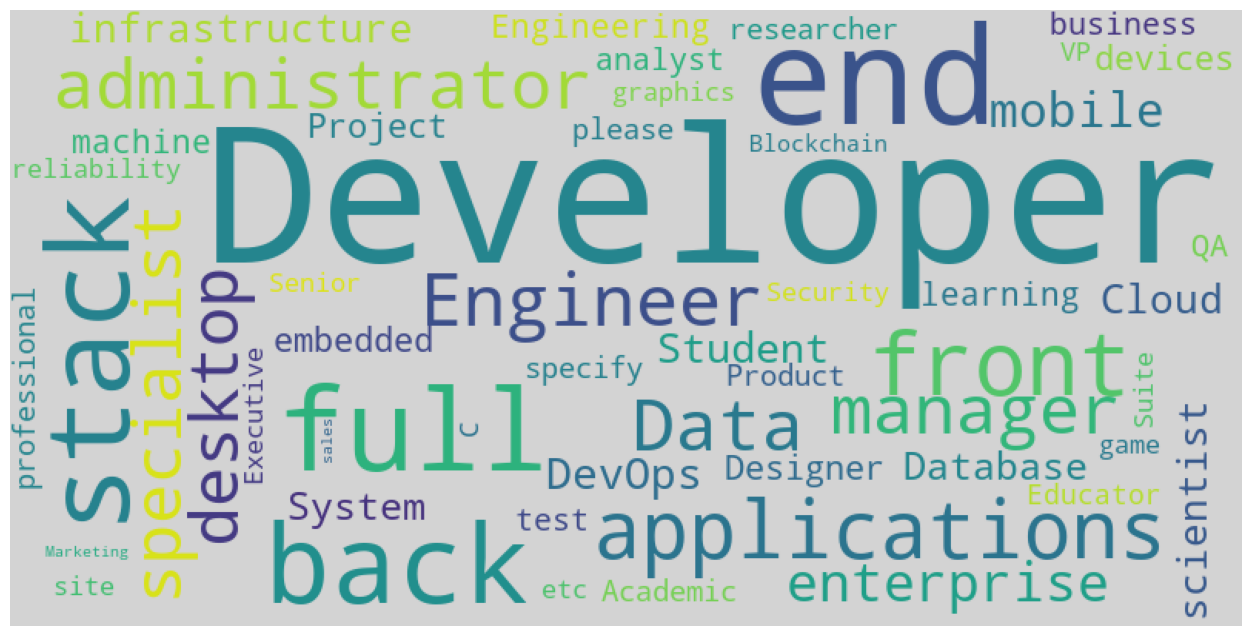

In [51]:
#한글이 포함되어있다면 한글 폰트 지정 
# font_path = [' 폰트 경로 ']
# max_font_size = 60 ---> 최대 글자의 크기를 지정  
wc = WordCloud(collocation_threshold=int(1e6),
              width=800, height=400,
              background_color='lightgrey').generate(words)
plt.figure(figsize=(16, 8))

# x, y축을 그리지 X
plt.axis("off")

# grid lines를 그리지 X
plt.grid(False)
plt.imshow(wc)
plt.show

In [53]:
# 저장하기 (jpg, gif도 가능)
wc.to_file("DevType.png")